In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import os
import nbconvert
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [109]:
os.getcwd()


In [111]:
dataset = pd.read_csv("survey_results_335_full.csv")
len(dataset)  # number of respondents

335

In [9]:
nbr_col = len(dataset.columns) 
nbr_col

65

In [102]:
# check missing data percentage to see whether it makes sense
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
percent_missing.sort_values(ascending=False) # sort as most missing first

# gender question permitting a comment is most missing followed by non-mandatory qs

In [112]:
# set standards for the figures 
plt.rcParams["axes.titlesize"] = 20 # set font size for title
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "Times New Roman"




## Q1 How long cycling



Text(0, 0.5, 'Number of cyclists')

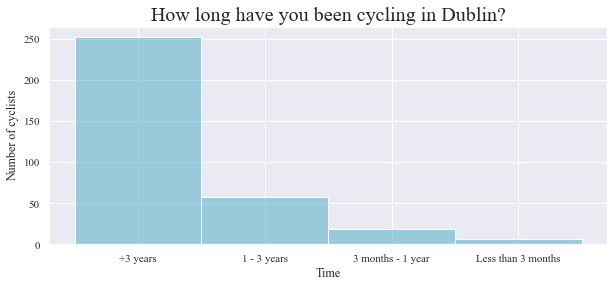

In [6]:
sns.set(rc={"figure.figsize":(10, 4)}) # width, height
sns.set(font="Times New Roman")

# reorder the xtick categories
dataset['How long have you been cycling in Dublin?'] = pd.Categorical(dataset['How long have you been cycling in Dublin?'], ['+3 years', '1 - 3 years', '3 months - 1 year', 'Less than 3 months'])

# plot
sns.histplot(dataset['How long have you been cycling in Dublin?'], color="c", alpha=.6)
plt.title('How long have you been cycling in Dublin?', fontdict={'fontsize': 20})
plt.xlabel('Time')
plt.ylabel('Number of cyclists')


#plt.savefig('how_long.jpg', format='jpeg', dpi=300)

In [87]:
# make df compatible to include percentage share of responses 
how_long = (dataset['How long have you been cycling in Dublin?'].value_counts(normalize=False)).to_frame()
how_long.reset_index(inplace=True) # give us back an index
how_long.columns = ['Experience','Count'] # rename columns
how_long


,Experience,Count
0,+3 years,252
1,1 - 3 years,58
2,3 months - 1 year,19
3,Less than 3 months,6


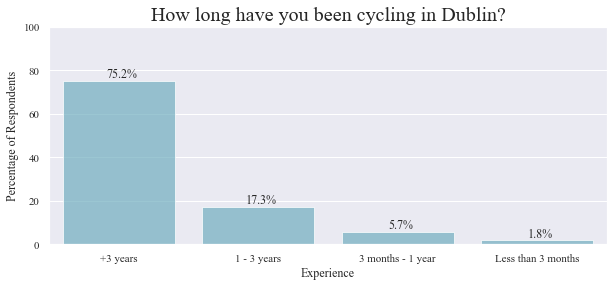

In [85]:
ax = sns.barplot(data=how_long, x='Experience', y='Count', color="c", alpha=.7)

plt.title('How long have you been cycling in Dublin?', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=0) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

## Q2 start during pandemic

No     0.844776
Yes    0.155224
Name: Did you start cycling in the city during the pandemic restriction period?, dtype: float64

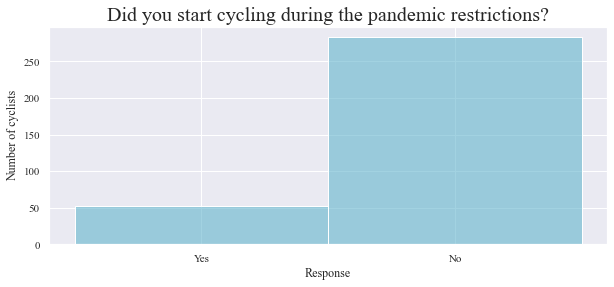

In [69]:
# plot answers and get percentage of those who did and did not

# reorder the xtick categories
dataset['Did you start cycling in the city during the pandemic restriction period?'] = pd.Categorical(dataset['Did you start cycling in the city during the pandemic restriction period?'], ['Yes', 'No'])

sns.histplot(dataset['Did you start cycling in the city during the pandemic restriction period?'], color="c", alpha=.6)
plt.title('Did you start cycling during the pandemic restrictions?', fontdict={'fontsize': 20})
plt.xlabel('Response')
plt.ylabel('Number of cyclists')

dataset['Did you start cycling in the city during the pandemic restriction period?'].value_counts(normalize=True)

In [139]:
# make df compatible to include percentage share of responses 

pandemic = (dataset['Did you start cycling in the city during the pandemic restriction period?'].value_counts(normalize=True)*100).to_frame()
pandemic.reset_index(inplace=True) # give us back an index
pandemic.columns = ['Experience','Count'] # rename columns

pandemic


,Experience,Count
0,No,84.477612
1,Yes,15.522388


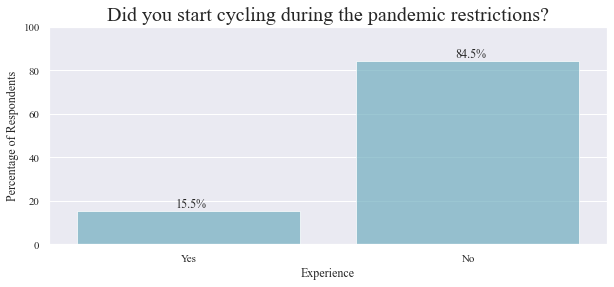

In [141]:
ax = sns.barplot(data=pandemic, x='Experience', y='Count', color="c", alpha=.70)

plt.title('Did you start cycling during the pandemic restrictions?', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=0) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

## Q3 How often cycle



([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

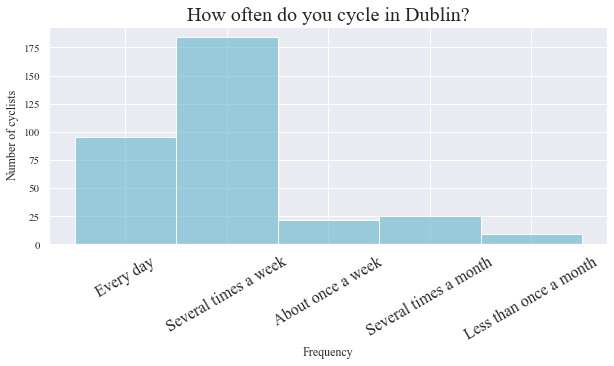

In [39]:
# reorder categories for x-axis
dataset['How often do you currently cycle in Dublin?'] = pd.Categorical(dataset['How often do you currently cycle in Dublin?'], ['Every day', 'Several times a week', 'About once a week', 'Several times a month', 'Less than once a month'])

#plot
sns.histplot(dataset['How often do you currently cycle in Dublin?'], color="c", alpha=.6)
plt.xlabel('Frequency')
plt.ylabel('Number of cyclists')
plt.title('How often do you cycle in Dublin?', fontdict={'fontsize': 20})
plt.xticks(rotation=30)


In [36]:
# make df compatible to include percentage share of responses 

how_often = (dataset['How often do you currently cycle in Dublin?'].value_counts(normalize=True)*100).to_frame()
how_often.reset_index(inplace=True) # give us back an index
how_often.columns = ['Experience','Count'] # rename columns
#how_often = how_often['Experience'].reindex(['Every day', 'Several times a week', 'Several times a month','About once a month', 'Less than once a month']) 

how_often


,Experience,Count
0,Several times a week,54.925373
1,Every day,28.358209
2,Several times a month,7.462687
3,About once a week,6.567164
4,Less than once a month,2.686567


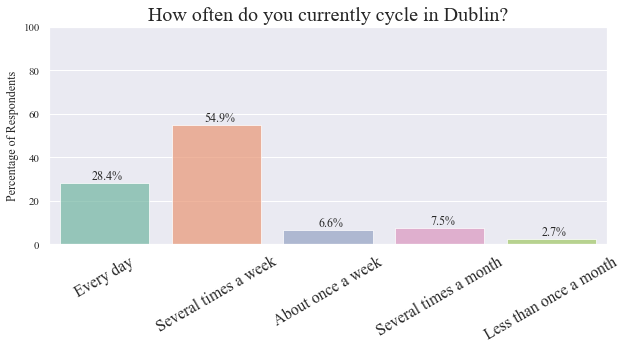

In [40]:
ax = sns.barplot(data=how_often, x='Experience', y='Count', palette="Set2", alpha=.70, order = ['Every day', 'Several times a week', 'About once a week', 'Several times a month', 'Less than once a month'])

plt.title('How often do you currently cycle in Dublin?', fontdict={'fontsize': 20})
plt.xlabel("")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=30) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

## Q4 Times usually cycled

In [115]:
# make dataset for times cycled
times_cycled = dataset.iloc[:,3:8]

# rename columns
times_cycled = times_cycled.rename(columns={'At what time do you usually cycle?     [Weekday rush hour]': 'Weekday rush hour', 'At what time do you usually cycle?     [Weekday non rush hour]': 'Weekday non-rush hour', 'At what time do you usually cycle?     [Weekend morning]': 'Weekend morning', 'At what time do you usually cycle?     [Weekend daytime]': 'Weekend daytime', 'At what time do you usually cycle?     [Weekend evening]': 'Weekend evening'})
times_cycled


# get max used day, min, stat difference of use between days?

,Weekday rush hour,Weekday non-rush hour,Weekend morning,Weekend daytime,Weekend evening
0,Yes,Yes,No,Yes,Yes
1,Yes,No,No,No,No
2,Yes,No,No,No,No
3,Yes,No,No,No,No
4,Yes,Yes,No,Yes,No
...,...,...,...,...,...
330,Yes,No,No,No,No
331,Yes,No,No,No,No
332,Yes,No,No,No,No
333,Yes,Yes,Yes,Yes,No


In [116]:
# View total day counts

weekday_rush= times_cycled['Weekday rush hour'].value_counts(normalize=True) # normalise makes percentage
weekday_nonrush= times_cycled['Weekday non-rush hour'].value_counts(normalize=True)
weekend_morning= times_cycled['Weekend morning'].value_counts(normalize=True)
weekend_daytime= times_cycled['Weekend daytime'].value_counts(normalize=True)
weekend_evening= times_cycled['Weekend evening'].value_counts(normalize=True)

print(weekday_rush); print(weekday_nonrush); 
print(weekend_morning); print(weekend_daytime);
print(weekend_evening);

Yes    0.8
No     0.2
Name: Weekday rush hour, dtype: float64
Yes    0.552239
No     0.447761
Name: Weekday non-rush hour, dtype: float64
No     0.620896
Yes    0.379104
Name: Weekend morning, dtype: float64
Yes    0.540299
No     0.459701
Name: Weekend daytime, dtype: float64
No     0.707463
Yes    0.292537
Name: Weekend evening, dtype: float64


In [117]:
# change yes to 1 and no to 0
times_cycled = times_cycled.replace({'Yes': 1, 'No': 0})
times_cycled

# sum each purpose's yes counts, convert to data frame and transpose
times_cycled_t = pd.DataFrame(times_cycled.sum()).T
times_cycled_t = times_cycled_t/(len(times_cycled))*100
times_cycled_t

,Weekday rush hour,Weekday non-rush hour,Weekend morning,Weekend daytime,Weekend evening
0,80.0,55.223881,37.910448,54.029851,29.253731


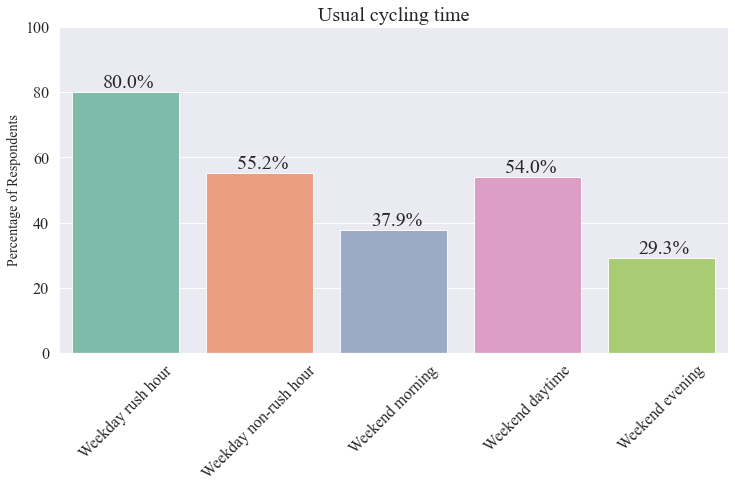

In [118]:
# visualise

ax = sns.barplot(data=times_cycled_t, palette="Set2", alpha=.9)

plt.title('Usual cycling time', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

## Q5 Purpose of cycling

In [119]:
# What is the general purpose of your cycling in Dublin? [Work/school commute]

purpose = dataset[['What is the general purpose of your cycling in Dublin? [Work/school commute]', 'What is the general purpose of your cycling in Dublin? [To reach leisure activities]', 'What is the general purpose of your cycling in Dublin? [Cycling as a leisure activity itself]', "What is the general purpose of your cycling in Dublin? [It's part of your employment e.g. food delivery]", 'What is the general purpose of your cycling in Dublin? [Household responsibilities eg. shopping, bringing children to activities ]', 'What is the general purpose of your cycling in Dublin? [Sport/competition]']]
purpose = purpose.rename(columns={'What is the general purpose of your cycling in Dublin? [Work/school commute]': 'Commute', 'What is the general purpose of your cycling in Dublin? [To reach leisure activities]': 'Reach Leisure', 'What is the general purpose of your cycling in Dublin? [Cycling as a leisure activity itself]':'Cycling as leisure', "What is the general purpose of your cycling in Dublin? [It's part of your employment e.g. food delivery]": 'Part of employment', 'What is the general purpose of your cycling in Dublin? [Household responsibilities eg. shopping, bringing children to activities ]':'Household responsibilities', 'What is the general purpose of your cycling in Dublin? [Sport/competition]':'Sport/Competition'})
purpose

,Commute,Reach Leisure,Cycling as leisure,Part of employment,Household responsibilities,Sport/Competition
0,Yes,Yes,No,No,No,No
1,Yes,No,Yes,No,No,No
2,Yes,No,Yes,No,No,No
3,Yes,Yes,No,No,No,No
4,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...
330,Yes,Yes,No,No,No,No
331,Yes,Yes,No,No,No,No
332,Yes,Yes,Yes,No,No,No
333,Yes,No,Yes,No,No,No


In [191]:
# view the percentages

print(purpose['Commute'].value_counts(normalize=True))
print(purpose['Reach Leisure'].value_counts(normalize=True))
print(purpose['Cycling as leisure'].value_counts(normalize=True))
print(purpose['Part of employment'].value_counts(normalize=True))
print(purpose['Household responsibilities'].value_counts(normalize=True))
print(purpose['Sport/Competition'].value_counts(normalize=True))


1    0.838806
0    0.161194
Name: Commute, dtype: float64
1    0.58209
0    0.41791
Name: Reach Leisure, dtype: float64
0    0.549254
1    0.450746
Name: Cycling as leisure, dtype: float64
0    0.997015
1    0.002985
Name: Part of employment, dtype: float64
1    0.501493
0    0.498507
Name: Household responsibilities, dtype: float64
0    0.931343
1    0.068657
Name: Sport/Competition, dtype: float64


In [120]:
# replace yes with 1 and no with 0 for plotting
replacer = {'Yes': 1, 'No': 0}

cols = purpose.columns[purpose.dtypes == 'object']
purpose[cols] = purpose[cols].replace(replacer)

# sum each purpose's yes counts, convert to data frame and transpose
purpose_total = pd.DataFrame(purpose.sum()).T
purpose_total = purpose_total/(len(purpose))*100
purpose_total

,Commute,Reach Leisure,Cycling as leisure,Part of employment,Household responsibilities,Sport/Competition
0,83.880597,58.208955,45.074627,0.298507,50.149254,6.865672


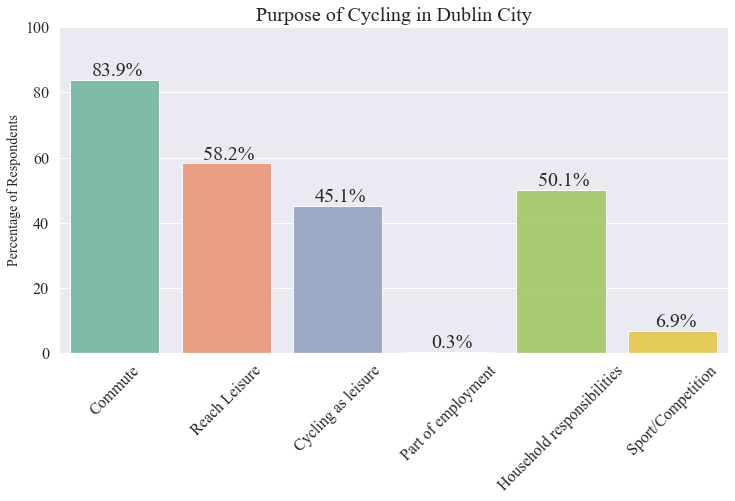

In [121]:
ax = sns.barplot(data=purpose_total, palette="Set2", alpha=.9)

plt.title('Purpose of Cycling in Dublin City', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

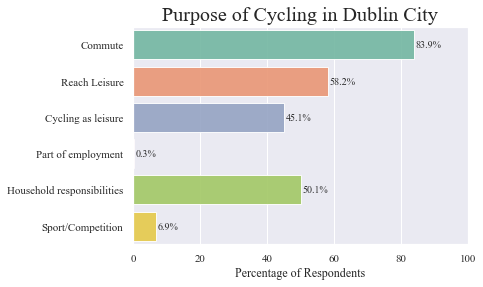

In [119]:
# horizontal plot for aesthetic comparison 
ax = sns.barplot(data=purpose_total, palette="Set2", alpha=.9, orient='h')

plt.title('Purpose of Cycling in Dublin City', fontdict={'fontsize': 20})
plt.xlabel("Percentage of Respondents")
ax.set_xlim(0, 100) # expand xlim to make labels easier to read


# For each bar: Place a label
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label
    space = 5
    # horizontal alignment
    ha = 'left'


    # Use X value as label and format number with one decimal place
    label = "{:.1f}%".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(2, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


## Q6 Why choose to cycle

In [113]:
reason = dataset[['Why do you choose to cycle as your form of transportation?  [Time efficiency]', 'Why do you choose to cycle as your form of transportation?  [Cost savings]', 'Why do you choose to cycle as your form of transportation?  [Environmental factors]', 'Why do you choose to cycle as your form of transportation?  [Enjoyment]', 'Why do you choose to cycle as your form of transportation?  [Health/fitness]', 'Why do you choose to cycle as your form of transportation?  [Extra training for sport cycling]']]
reason = reason.rename(columns={'Why do you choose to cycle as your form of transportation?  [Time efficiency]':'Time efficiency', 'Why do you choose to cycle as your form of transportation?  [Cost savings]':'Financial savings', 'Why do you choose to cycle as your form of transportation?  [Environmental factors]':'Environmental reasons', 'Why do you choose to cycle as your form of transportation?  [Enjoyment]':'Enjoyment', 'Why do you choose to cycle as your form of transportation?  [Health/fitness]':'Health', 'Why do you choose to cycle as your form of transportation?  [Extra training for sport cycling]':'Sports training'})
reason

,Time efficiency,Financial savings,Environmental reasons,Enjoyment,Health,Sports training
0,Yes,Yes,Yes,Yes,Yes,No
1,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes
3,Yes,No,No,No,No,No
4,Yes,Yes,Yes,No,Yes,No
...,...,...,...,...,...,...
330,Yes,No,Yes,Yes,Yes,No
331,Yes,No,Yes,No,No,No
332,Yes,No,No,No,No,No
333,Yes,Yes,Yes,Yes,Yes,No


In [110]:
print(reason['Time efficiency'].value_counts(normalize=True))
print(reason['Financial savings'].value_counts(normalize=True))
print(reason['Environmental reasons'].value_counts(normalize=True))
print(reason['Enjoyment'].value_counts(normalize=True))
print(reason['Health'].value_counts(normalize=True))
print(reason['Sports training'].value_counts(normalize=True))


Yes    0.895522
No     0.104478
Name: Time efficiency, dtype: float64
Yes    0.686567
No     0.313433
Name: Financial savings, dtype: float64
Yes    0.81194
No     0.18806
Name: Environmental reasons, dtype: float64
Yes    0.710448
No     0.289552
Name: Enjoyment, dtype: float64
Yes    0.814925
No     0.185075
Name: Health, dtype: float64
No     0.931343
Yes    0.068657
Name: Sports training, dtype: float64


In [114]:
# replace yes with 1 and no with 0 for plotting
replacer = {'Yes': 1, 'No': 0}

cols = reason.columns[reason.dtypes == 'object']
reason[cols] = reason[cols].replace(replacer)

# sum each purpose's yes counts, convert to data frame and transpose
reason_total = pd.DataFrame(reason.sum()).T
reason_total = reason_total/(len(reason))*100
reason_total

,Time efficiency,Financial savings,Environmental reasons,Enjoyment,Health,Sports training
0,89.552239,68.656716,81.19403,71.044776,81.492537,6.865672


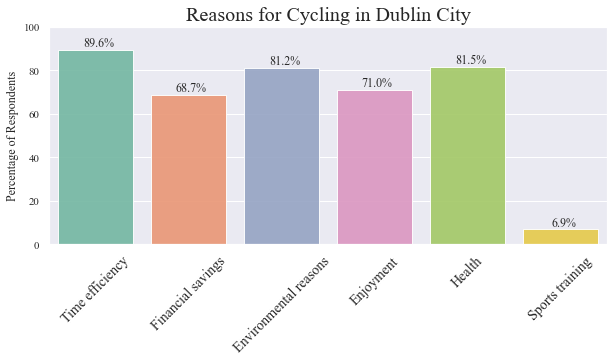

In [162]:
b = sns.barplot(data=reason_total, palette="Set2", alpha=.9)
b.set_ylim(0,100)

plt.title('Reasons for Cycling in Dublin City', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45) 

# label heights of bars i.e. percentages on plot
rects = b.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        b.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)


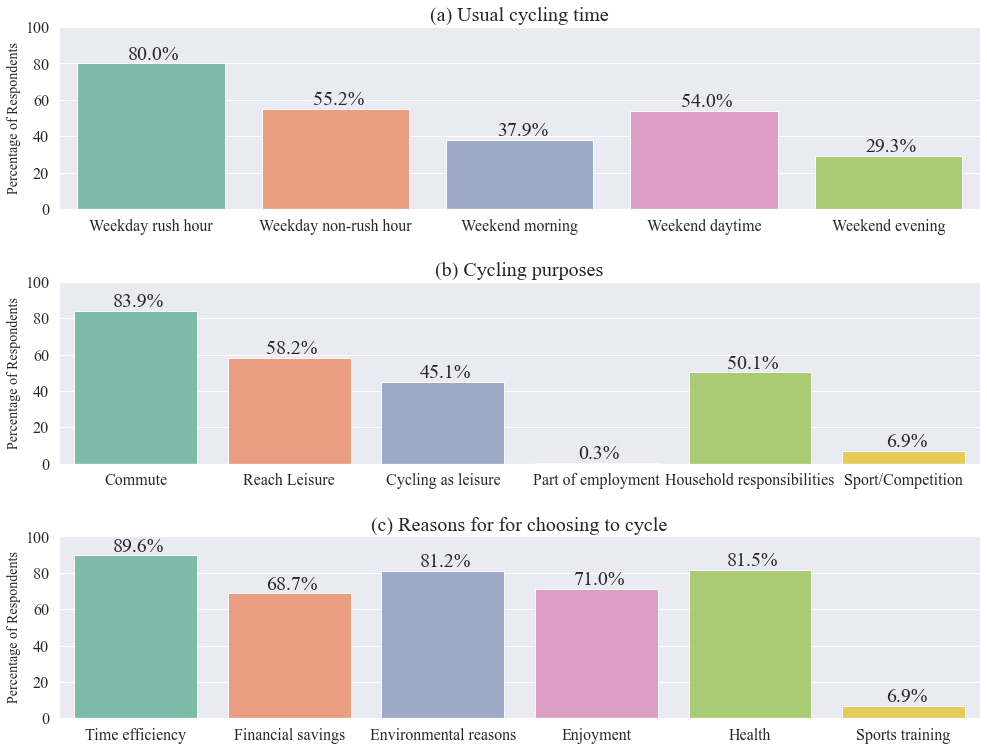

In [123]:
# create plot of mutiple above of interest

plt.figure(figsize=(16,12)) 
plt.rc('xtick', labelsize=16)

plt.subplot(3,1,1) # Q4 usual time

ax = sns.barplot(data=times_cycled_t, palette="Set2", alpha=.9)

plt.title('(a) Usual cycling time', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)


plt.subplot(3,1,2) # Q5 purpose

bx = sns.barplot(data=purpose_total, palette="Set2", alpha=.9)

plt.title('(b) Cycling purposes', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
bx.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = bx.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        bx.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)


plt.subplot(3,1,3) # Q6 why choose

cx = sns.barplot(data=reason_total, palette="Set2", alpha=.9)
cx.set_ylim(0,100)

plt.title('(c) Reasons for for choosing to cycle', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")

# label heights of bars i.e. percentages on plot
rects = cx.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        cx.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

# set the spacing between subplots
#plt.tight_layout() 
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

 

plt.savefig("cycling_basics.jpg", format='jpeg', dpi=400)

## Q7 Experience cycling in Dublin?

In [167]:
experience_ofcycling = dataset[['How would you generally describe your experience cycling in Dublin?']]
#print(experience_ofcycling.value_counts())
experience_ofcycling


,How would you generally describe your experience cycling in Dublin?
0,Good
1,Bad
2,Acceptable
3,Bad
4,Acceptable
...,...
330,Bad
331,Terrible
332,Good
333,Acceptable


In [168]:
# make df compatible to create piechart
experience_ofcycling = experience_ofcycling.value_counts().to_frame()
experience_ofcycling.reset_index(inplace=True) # give us back an index
experience_ofcycling.columns = ['Experience','Count'] # rename columns
experience_ofcycling
#plt.pie(data=experience_ofcycling, colors="Set2")
#plt.show()

,Experience,Count
0,Acceptable,145
1,Bad,101
2,Good,68
3,Terrible,12
4,Excellent,9


In [176]:
# reorder categories
experience_ofcycling['Experience'] = pd.Categorical(experience_ofcycling['Experience'], ['Excellent', 'Good', 'Acceptable', 'Terrible', 'Bad'])
experience_ofcycling

,Experience,Count
0,Acceptable,145
1,Bad,101
2,Good,68
3,Terrible,12
4,Excellent,9


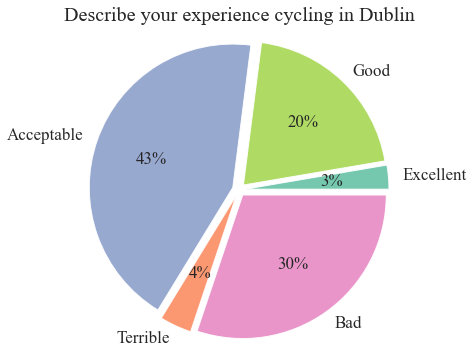

In [183]:
# Create pie chart with spaces

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
cls = [ '#66c2a5', '#a6d854','#8da0cb', '#fc8d62', '#e78ac3'] # set hex color codes

experience_ofcycling.groupby(['Experience']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=0, colors= cls, legend = None, labeldistance=1.1, wedgeprops={'alpha':0.9}, 
                                                        textprops={"fontsize":17}, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(loc='upper center', fontsize=12, 
           #bbox_to_anchor=(0.5, -0.04), ncol=2, title = "")
plt.title('Describe your experience cycling in Dublin', fontdict={'fontsize': 20})
plt.ylabel("")

# Save pie chart
#plt.savefig('experience_pie.png')

## Q8 favourite time of day to cycle? when and why?

In [74]:
do_you_fav_time = dataset[['Do you have a favourite time of day to cycle? Please comment on when and why?', 'Do you have a favourite time of day to cycle? Please comment on when and why? [Comment]']]
do_you_fav_time


,Do you have a favourite time of day to cycle? Please comment on when and why?,Do you have a favourite time of day to cycle? Please comment on when and why? [Comment]
0,Yes,I like cycling in the weekends when the roads ...
1,No,NaN
2,No,NaN
3,No,NaN
4,No,NaN
...,...,...
330,Yes,Saturday and Sunday mornings
331,No,"A crisp summers morning, but that's the best t..."
332,Yes,Early Sunday morning as there is very little t...
333,Yes,Early morning


In [75]:
# view percentage of no and yes responses

do_you_fav_time['Do you have a favourite time of day to cycle? Please comment on when and why?'].value_counts(normalize=True) # normalise makes percentage


Yes    0.55988
No     0.44012
Name: Do you have a favourite time of day to cycle? Please comment on when and why?, dtype: float64

In [76]:
# Filter only yes responses, remove 'no' answers and NaNs

fav_time = do_you_fav_time[do_you_fav_time['Do you have a favourite time of day to cycle? Please comment on when and why?'] == 'Yes']
fav_time

,Do you have a favourite time of day to cycle? Please comment on when and why?,Do you have a favourite time of day to cycle? Please comment on when and why? [Comment]
0,Yes,I like cycling in the weekends when the roads ...
6,Yes,After the morning rush hour but before lunch t...
10,Yes,Early morning
14,Yes,"Early on weekend mornings, particularly Sunday..."
21,Yes,Between 10am-2.30pm during term time and up to...
...,...,...
328,Yes,Outside of rush hour. Whenever there is the sm...
330,Yes,Saturday and Sunday mornings
332,Yes,Early Sunday morning as there is very little t...
333,Yes,Early morning


In [99]:
# count how many people mention "quiet"
# can search other words eg. morning, evening, danger

print(fav_time["Do you have a favourite time of day to cycle? Please comment on when and why? [Comment]"].str.count("quiet").sum())
print(len(fav_time)) 


4
187


## Soundscape Appraisal
## Q9  sound environment cycling in Dublin

Drew from Aletta 2018 soundscape appraisal terms

In [124]:
soundscape = dataset[['Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Vibrant]', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Calm]', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Pleasant]', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Chaotic]', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Annoying]']]
soundscape = soundscape.rename(columns={'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Vibrant]':'Vibrant', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Calm]':'Calm', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Pleasant]':'Pleasant', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Chaotic]':'Chaotic', 'Overall, the sound environment while cycling in Dublin is: (Please indicate whether you agree or disagree) [Annoying]':'Annoying'})
soundscape



,Vibrant,Calm,Pleasant,Chaotic,Annoying
0,Agree,Disagree,Agree,Disagree,Disagree
1,Agree,Disagree,Neutral,Agree,Neutral
2,Agree,Neutral,Neutral,Agree,Agree
3,Neutral,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree
4,Neutral,Agree,Neutral,Disagree,Disagree
...,...,...,...,...,...
330,Agree,Strongly disagree,Disagree,Agree,Agree
331,Agree,Strongly disagree,Disagree,Agree,Agree
332,Neutral,Neutral,Neutral,Agree,Agree
333,Neutral,Disagree,Neutral,Agree,Disagree


In [73]:
# see what I'm working with 
# what percentage agree with each appraisal 
print(soundscape['Vibrant'].value_counts(normalize=True)) 
print(soundscape['Calm'].value_counts(normalize=True))
print(soundscape['Pleasant'].value_counts(normalize=True))
print(soundscape['Chaotic'].value_counts(normalize=True))
print(soundscape['Annoying'].value_counts(normalize=True))



Neutral              0.417910
Agree                0.307463
Disagree             0.185075
Strongly disagree    0.053731
Strongly agree       0.035821
Name: Vibrant, dtype: float64
Disagree             0.516418
Strongly disagree    0.238806
Neutral              0.194030
Agree                0.047761
Strongly agree       0.002985
Name: Calm, dtype: float64
Disagree             0.420896
Neutral              0.331343
Agree                0.122388
Strongly disagree    0.119403
Strongly agree       0.005970
Name: Pleasant, dtype: float64
Agree                0.537313
Strongly agree       0.208955
Neutral              0.167164
Disagree             0.080597
Strongly disagree    0.005970
Name: Chaotic, dtype: float64
Agree                0.474627
Neutral              0.265672
Strongly agree       0.128358
Disagree             0.119403
Strongly disagree    0.011940
Name: Annoying, dtype: float64


In [125]:
# put proportions into dataframe
sound_agree = (soundscape['Annoying'].value_counts(normalize=True)).to_frame()
sound_agree

,Annoying
Agree,0.474627
Neutral,0.265672
Strongly agree,0.128358
Disagree,0.119403
Strongly disagree,0.011940


In [126]:
# Create new column quantifying level of agreement with each adjective
sound_agree = (soundscape['Annoying'].value_counts(normalize=True)).to_frame()
sound_agree = pd.concat([sound_agree, soundscape['Chaotic'].value_counts(normalize=True), soundscape['Pleasant'].value_counts(normalize=True), soundscape['Calm'].value_counts(normalize=True), soundscape['Vibrant'].value_counts(normalize=True)], axis=1)
sound_agree = sound_agree.T
cls = ['Agree', 'Strongly agree']
sound_agree['Agreement'] = sound_agree[cls].sum(axis = 1)
sound_agree

,Agree,Neutral,Strongly agree,Disagree,Strongly disagree,Agreement
Annoying,0.474627,0.265672,0.128358,0.119403,0.011940,0.602985
Chaotic,0.537313,0.167164,0.208955,0.080597,0.005970,0.746269
Pleasant,0.122388,0.331343,0.005970,0.420896,0.119403,0.128358
Calm,0.047761,0.194030,0.002985,0.516418,0.238806,0.050746
Vibrant,0.307463,0.417910,0.035821,0.185075,0.053731,0.343284


In [127]:
# replace ratings with scorings
replacer = {'Strongly disagree': 1, 'Disagree': 2,
            'Neutral': 3,
            'Agree': 4, 'Strongly agree': 5}

cols = ['Vibrant', 'Calm', 'Pleasant']
soundscape[cols] = soundscape[cols].replace(replacer)

# chaotic and annoying are reverse scored
replacer2 = {'Strongly disagree': 5, 'Disagree': 4,
            'Neutral': 3,
            'Agree': 2, 'Strongly agree': 1}

cols2 = ['Chaotic', 'Annoying']
soundscape[cols2] = soundscape[cols2].replace(replacer2)
soundscape

# higher is more positive

,Vibrant,Calm,Pleasant,Chaotic,Annoying
0,4,2,4,4,4
1,4,2,3,2,3
2,4,3,3,2,2
3,3,1,1,1,1
4,3,4,3,4,4
...,...,...,...,...,...
330,4,1,2,2,2
331,4,1,2,2,2
332,3,3,3,2,2
333,3,2,3,2,4


In [128]:
# Assess whether participans generally agreed with positive or negative reflections

# create data frame of participants and their scores
participant = list(range(1,(len(dataset))+1))
participant

# get pos or neg scoring
soundscape_score = soundscape.sum(axis = 1) # sum the rows

# collab into data frame and divide scores by 3 for ease 
pp_soundscape = pd.DataFrame({'Participant': participant, 'Soundscape Score': (soundscape_score/5)})
pp_soundscape


,Participant,Soundscape Score
0,1,3.6
1,2,2.8
2,3,2.8
3,4,1.4
4,5,3.6
...,...,...
330,331,2.2
331,332,2.2
332,333,2.6
333,334,2.8


In [129]:
# Categorise ratings into positive or negative

#pp_soundscape['Soundscape Rating'] = np.where(
    #pp_soundscape['Soundscape Score'] == 3, 'Neutral', np.where(
    #pp_soundscape['Soundscape Score'] <  3, 'Negative', 'Positive')) 
#pp_soundscape

#### I then decided to consider neutral as positive for ease of comparisons


pp_soundscape['Soundscape Rating'] = np.where(
    pp_soundscape['Soundscape Score'] <  3, 'Negative', 'Positive') 
pp_soundscape

,Participant,Soundscape Score,Soundscape Rating
0,1,3.6,Positive
1,2,2.8,Negative
2,3,2.8,Negative
3,4,1.4,Negative
4,5,3.6,Positive
...,...,...,...
330,331,2.2,Negative
331,332,2.2,Negative
332,333,2.6,Negative
333,334,2.8,Negative


In [15]:
# percentage of people with more posisitve or negative views of the city 
# (considering neutral as positive) 
print(pp_soundscape['Soundscape Rating'].value_counts(normalize=True)) 

Negative    0.773134
Positive    0.226866
Name: Soundscape Rating, dtype: float64


Text(0, 0.5, '')

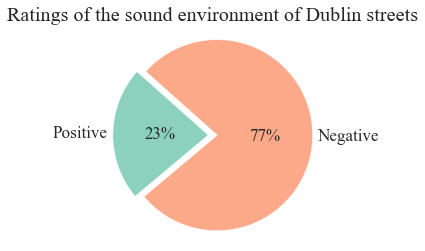

In [79]:
# Create pie chart

# make df compatible to create piechart
soundscape_ratings = pp_soundscape['Soundscape Rating'].value_counts().to_frame()
soundscape_ratings.reset_index(inplace=True) # give us back an index
soundscape_ratings.columns = ['Rating','Count'] # rename columns
soundscape_ratings

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes

soundscape_ratings.groupby(['Rating']).sum().plot(kind='pie', 
                                                 y = 'Count', autopct='%1.0f%%', explode=explode, 
                                                 startangle=220, colors = cls, wedgeprops={'alpha':0.75}, 
                                                 textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('Ratings of the sound environment of Dublin streets', fontdict={'fontsize': 20})
plt.ylabel("")

#plt.savefig('soundscape_pie.jpg', format='jpeg', dpi=400)

##  Q10 is time of day you choose to cycle influenced by noise

In [130]:
time_influence = dataset['Do you think the time of day you choose to cycle is influenced by the level of road traffic noise?']


# make df compatible to create piechart
time_influence_df = time_influence.value_counts().to_frame()
time_influence_df.reset_index(inplace=True) # give us back an index
time_influence_df.columns = ['Time influenced by noise','Count'] # rename columns
time_influence_df

,Time influenced by noise,Count
0,No,227
1,Yes,108


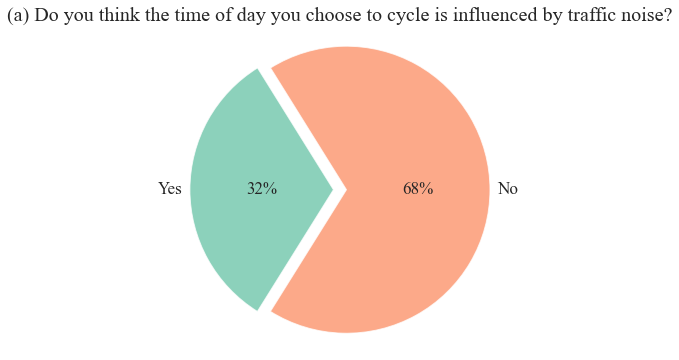

In [139]:
# Create pie chart

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes

time_influence_df.groupby(['Time influenced by noise']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=238, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('(a) Do you think the time of day you choose to cycle is influenced by traffic noise?', fontdict={'fontsize': 20})
plt.ylabel("")

#plt.figure(figsize=(12,14)) # may want to resize plt

# link of great help
# https://pythonguides.com/matplotlib-pie-chart/#:~:text=To%20change%20the%20color%20of%20the%20pie%20chart%2C,following%20is%20the%20syntax%3A%20matplotlib.pyplot.pie%20%28x%2C%20labels%3DNone%2C%20colors%3DNone%29

# Save pie chart

plt.savefig('timeinfluence_pie.jpg', format='jpeg', dpi=400)


## Q11 Has general well-being been affected

In [131]:
well_being = dataset['Do you think your general well-being has been affected in some way by road traffic noise while cycling in Dublin?']

# make df compatible to create piechart
well_being_df = well_being.value_counts().to_frame()
well_being_df.reset_index(inplace=True) # give us back an index
well_being_df.columns = ['Well-being influenced by noise','Count'] # rename columns
well_being_df

,Well-being influenced by noise,Count
0,No,171
1,Yes,164


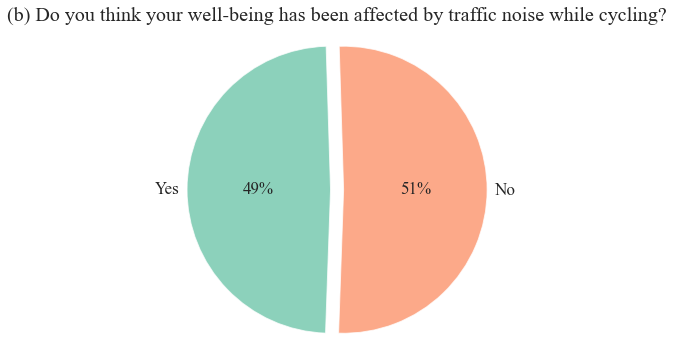

In [140]:
# Create pie chart

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes

well_being_df.groupby(['Well-being influenced by noise']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=268, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('(b) Do you think your well-being has been affected by traffic noise while cycling?', fontdict={'fontsize': 20})
plt.ylabel("")

plt.savefig('wellbeing_pie.jpg', format='jpeg', dpi=400)

## Q12 When cycling with someone else can you hear them talking?

In [133]:
companion = dataset['When cycling with someone else can you hear them talking?']

# make df compatible to create piechart
companion = companion.value_counts().to_frame()
companion.reset_index(inplace=True) # give us back an index
companion.columns = ['Can you hear a companion','Count'] # rename columns
companion

,Can you hear a companion,Count
0,I don't talk with someone while cycling,147
1,No,116
2,Yes,72


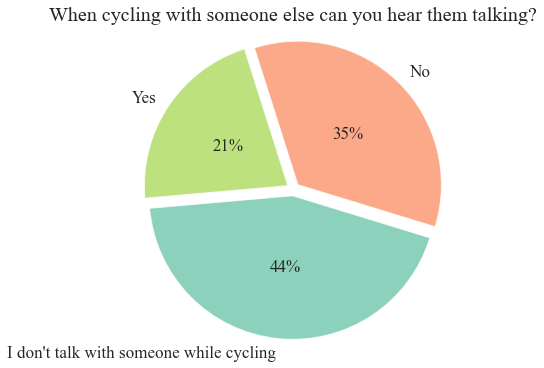

In [136]:
# Create pie chart

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)
cls = ['#66c2a5', '#fc8d62', '#a6d854'] # set hex color codes

companion.groupby(['Can you hear a companion']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=185, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.1, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('(c) When cycling with someone else can you hear them talking?', fontdict={'fontsize': 20})
plt.ylabel("")

plt.savefig('companion_pie.jpg', format='jpeg', dpi=400)

## Q13 aggreement sentences when cycling in a loud environment

Marquart 2022 protective practices 

In [45]:
loud_cycling = dataset[['When cycling in a loud environment: (Please indicate whether you agree or disagree) [I am bothered by the noise]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I move to cycle closer to the kerb]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I actively try to ignore the noise]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I enjoy myself]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I move to cycle away from the kerb and towards the centre of the lane]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I get used to the noise without much trouble]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I worry about being exposed to exhaust fumes]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I feel safe]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I feel parts of my body tense up]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I wear headphones]', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I worry about noise exposure]']]
loud_cycling = loud_cycling.rename(columns={'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I am bothered by the noise]': 'I am bothered by the noise', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I move to cycle closer to the kerb]':'I cycle closer to the kerb', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I actively try to ignore the noise]':'I try to ignore the noise', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I enjoy myself]':'I enjoy myself', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I move to cycle away from the kerb and towards the centre of the lane]':'I take the centre of the lane', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I get used to the noise without much trouble]': 'I get used to the noise easily', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I worry about being exposed to exhaust fumes]':'I worry about exhaust fume exposure', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I feel safe]': 'I feel safe', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I feel parts of my body tense up]':'My body tenses', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I wear headphones]':'I wear headphones', 'When cycling in a loud environment: (Please indicate whether you agree or disagree) [I worry about noise exposure]':'I worry about noise exposure'})
loud_cycling


,I am bothered by the noise,I cycle closer to the kerb,I try to ignore the noise,I enjoy myself,I take the centre of the lane,I get used to the noise easily,I worry about exhaust fume exposure,I feel safe,My body tenses,I wear headphones,I worry about noise exposure
0,Strongly disagree,Disagree,Strongly agree,Disagree,Disagree,Agree,Agree,Neutral,Disagree,Agree,Strongly disagree
1,Strongly agree,Disagree,Agree,Neutral,Disagree,Agree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Agree
2,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Disagree,Neutral,Disagree,Agree
3,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Neutral,Disagree,Strongly disagree,Agree,Strongly disagree,Strongly disagree
4,Neutral,Disagree,Agree,Neutral,Neutral,Strongly agree,Neutral,Neutral,Disagree,Strongly disagree,Strongly disagree
...,...,...,...,...,...,...,...,...,...,...,...
330,Agree,Agree,Neutral,Disagree,Disagree,Disagree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Neutral
331,Neutral,Disagree,Neutral,Disagree,Agree,Neutral,Agree,Strongly disagree,Strongly agree,Strongly disagree,Disagree
332,Strongly agree,Neutral,Neutral,Strongly disagree,Neutral,Neutral,Strongly agree,Disagree,Agree,Strongly disagree,Agree
333,Disagree,Neutral,Disagree,Agree,Disagree,Agree,Neutral,Disagree,Disagree,Strongly agree,Neutral


In [59]:
# create column quantifying the level of agreement with each statement
loud_cycling_agree = (loud_cycling['I am bothered by the noise'].value_counts(normalize=True)).to_frame()
loud_cycling_agree = pd.concat([loud_cycling_agree, loud_cycling['I cycle closer to the kerb'].value_counts(normalize=True), loud_cycling['I try to ignore the noise'].value_counts(normalize=True), loud_cycling['I enjoy myself'].value_counts(normalize=True), loud_cycling['I take the centre of the lane'].value_counts(normalize=True), loud_cycling['I get used to the noise easily'].value_counts(normalize=True), loud_cycling['I worry about exhaust fume exposure'].value_counts(normalize=True), loud_cycling['I feel safe'].value_counts(normalize=True), loud_cycling['My body tenses'].value_counts(normalize=True), loud_cycling['I wear headphones'].value_counts(normalize=True), loud_cycling['I worry about noise exposure'].value_counts(normalize=True)], axis=1)
loud_cycling_agree = loud_cycling_agree.T
cls = ['Agree', 'Strongly agree']
loud_cycling_agree['Agreement'] = loud_cycling_agree[cls].sum(axis = 1)
loud_cycling_agree

,Agree,Neutral,Strongly agree,Disagree,Strongly disagree,Agreement
I am bothered by the noise,0.414925,0.229851,0.188060,0.152239,0.014925,0.602985
I cycle closer to the kerb,0.214925,0.214925,0.086567,0.388060,0.095522,0.301493
I try to ignore the noise,0.367164,0.331343,0.056716,0.217910,0.026866,0.423881
I enjoy myself,0.149254,0.402985,0.020896,0.352239,0.074627,0.170149
I take the centre of the lane,0.194030,0.292537,0.053731,0.367164,0.092537,0.247761
I get used to the noise easily,0.423881,0.247761,0.050746,0.247761,0.029851,0.474627
I worry about exhaust fume exposure,0.411940,0.101493,0.408955,0.071642,0.005970,0.820896
I feel safe,0.059701,0.238806,0.005970,0.477612,0.217910,0.065672
My body tenses,0.429851,0.229851,0.140299,0.170149,0.029851,0.570149
I wear headphones,0.170149,0.083582,0.050746,0.182090,0.513433,0.220896


## Q14 any detours and estimate how much time lost

In [134]:
detour = dataset['Do you take any detours to avoid cycling on noisy routes? Please comment estimating how much time per week you add to your journeys via these detours:']

# make df compatible to create piechart
detour_count = detour.value_counts().to_frame()
detour_count.reset_index(inplace=True) # give us back an index
detour_count.columns = ['Detours to avoid cycling noisy routes','Count'] # rename columns
detour_count

,Detours to avoid cycling noisy routes,Count
0,No,206
1,Yes,129


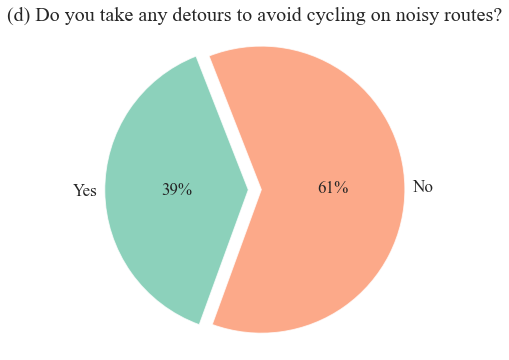

In [141]:
# Create pie chart

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes

detour_count.groupby(['Detours to avoid cycling noisy routes']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=250, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('(d) Do you take any detours to avoid cycling on noisy routes?', fontdict={'fontsize': 20})
plt.ylabel("")

plt.savefig('detours_pie.jpg', format='jpeg', dpi=400)

In [188]:
#filter only comments, remove NaNs
detour_comments = dataset[['Do you take any detours to avoid cycling on noisy routes? Please comment estimating how much time per week you add to your journeys via these detours: [Comment]']]
detour_comments = detour_comments.dropna()
detour_comments

# export to excel to get a better look
#detour_comments.to_excel(r'Survey_detour_time.xlsx', index = False)


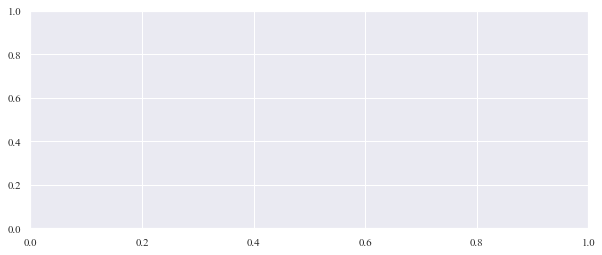

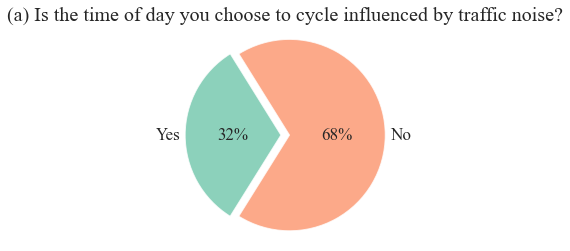

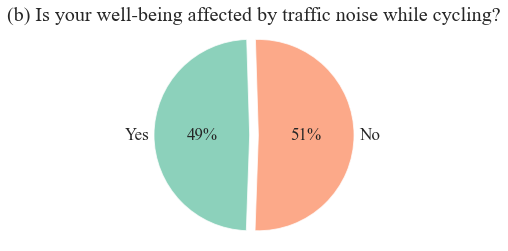

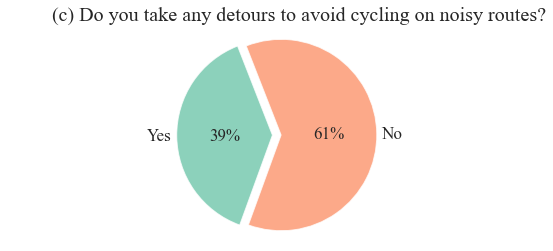

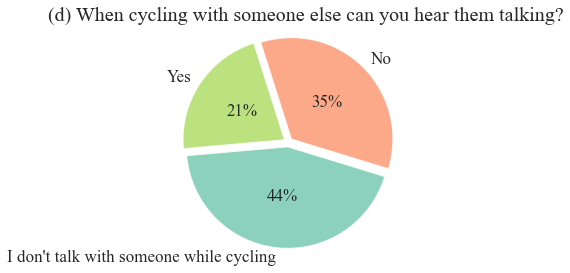

In [87]:
# Aggregated plots of the above questions for thesis document

# Q 10 time infuenced by noise

explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes
plt.ylabel("")
time_influence_df.groupby(['Time influenced by noise']).sum().plot(kind='pie', 
                                                        subplots=True, autopct='%1.0f%%', explode=explode, 
                                                        startangle=238, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
plt.title('(a) Is the time of day you choose to cycle influenced by traffic noise?', fontdict={'fontsize': 20})

# Q 11 well-being

plt.ylabel("")
well_being_df.groupby(['Well-being influenced by noise']).sum().plot(kind='pie', 
                                                        subplots=True, autopct='%1.0f%%', explode=explode, 
                                                        startangle=268, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('(b) Is your well-being affected by traffic noise while cycling?', fontdict={'fontsize': 20})


# Q14 detour
explode = (0.05, 0.05)
cls = ['#fc8d62', '#66c2a5'] # set hex color codes
plt.ylabel("")
detour_count.groupby(['Detours to avoid cycling noisy routes']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=250, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.05, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('         (c) Do you take any detours to avoid cycling on noisy routes?', fontdict={'fontsize': 20})
plt.ylabel("")


# Q 12 companion talking 
explode = (0.05, 0.05, 0.05)
cls = ['#66c2a5', '#fc8d62', '#a6d854'] # set hex color codes
companion.groupby(['Can you hear a companion']).sum().plot(kind='pie', 
                                                        y='Count', autopct='%1.0f%%', explode=explode, 
                                                        startangle=185, colors = cls, wedgeprops={'alpha':0.75}, 
                                                        textprops={"fontsize":17}, legend = None, pctdistance=0.5, labeldistance=1.1, radius=1.1)
# use pctdistance=1.7, labeldistance=1.2 in plot call above to change distance of labels and percentages
#plt.legend(labels = time_day_t['Time influenced by noise'], title = "Do you think the time of day you choose to cycle is influenced by traffic noise?", loc='upper center', fontsize=12, bbox_to_anchor=(0.5, -0.04))
plt.title('       (d) When cycling with someone else can you hear them talking?', fontdict={'fontsize': 20})
plt.ylabel("")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig('noiseinfluence_pie.jpg', format='jpeg', dpi=400)

## Q15 Has cycling in Dublin ever left you feeling

In [61]:
# emotional toll
cycling_feeling = dataset[['Has cycling in Dublin ever left you feeling: [Irritable/angry]', 'Has cycling in Dublin ever left you feeling: [Very tired]', 'Has cycling in Dublin ever left you feeling: [Unhappy]', 'Has cycling in Dublin ever left you feeling: [Anxious/nervous]', 'Has cycling in Dublin ever left you feeling: [Unsociable]', 'Has cycling in Dublin ever left you feeling: [Headaches, upset stomach]']]
cycling_feeling = cycling_feeling.rename(columns={'Has cycling in Dublin ever left you feeling: [Irritable/angry]': 'Irritable/angry', 'Has cycling in Dublin ever left you feeling: [Very tired]':'Very tired', 'Has cycling in Dublin ever left you feeling: [Unhappy]':'Unhappy', 'Has cycling in Dublin ever left you feeling: [Anxious/nervous]':'Anxious/nervous', 'Has cycling in Dublin ever left you feeling: [Unsociable]': 'Unsociable', 'Has cycling in Dublin ever left you feeling: [Headaches, upset stomach]':'Headaches, upset stomach'})
cycling_feeling


,Irritable/angry,Very tired,Unhappy,Anxious/nervous,Unsociable,"Headaches, upset stomach"
0,"Yes, but rarely",Never,Never,"Yes, but rarely","Yes, but rarely",Never
1,"Yes, often","Yes, but rarely","Yes, but rarely","Yes, but rarely","Yes, but rarely",Never
2,"Yes, but rarely","Yes, but rarely",Unsure,"Yes, but rarely",Unsure,Unsure
3,"Yes, often",Unsure,"Yes, often","Yes, often",Unsure,Never
4,Unsure,Never,Never,Unsure,Never,Never
...,...,...,...,...,...,...
330,"Yes, often","Yes, but rarely","Yes, often","Yes, often",Never,Unsure
331,"Yes, often","Yes, often","Yes, often","Yes, often","Yes, often",Unsure
332,"Yes, but rarely",Never,Unsure,"Yes, but rarely",Never,Never
333,"Yes, but rarely","Yes, often",Unsure,Unsure,Never,Never


In [65]:
# create column quantifying the level of agreement with each statement
feeling_agree = (cycling_feeling['Irritable/angry'].value_counts(normalize=True)).to_frame()
feeling_agree = pd.concat([feeling_agree, cycling_feeling['Very tired'].value_counts(normalize=True), cycling_feeling['Unhappy'].value_counts(normalize=True), cycling_feeling['Anxious/nervous'].value_counts(normalize=True), cycling_feeling['Unsociable'].value_counts(normalize=True), cycling_feeling['Headaches, upset stomach'].value_counts(normalize=True)], axis=1)
feeling_agree = feeling_agree.T
cls = ['Yes, often', 'Yes, but rarely']
feeling_agree['Agreement'] = feeling_agree[cls].sum(axis = 1)
feeling_agree

,"Yes, often","Yes, but rarely",Unsure,Never,Agreement
Irritable/angry,0.474627,0.435821,0.047761,0.041791,0.910448
Very tired,0.140299,0.447761,0.179104,0.232836,0.588060
Unhappy,0.200000,0.468657,0.122388,0.208955,0.668657
Anxious/nervous,0.337313,0.447761,0.083582,0.131343,0.785075
Unsociable,0.053731,0.116418,0.229851,0.600000,0.170149
"Headaches, upset stomach",0.014925,0.059701,0.134328,0.791045,0.074627


In [169]:
# in case of needing a score for analyses

# replace ratings with scores
replacer = {'Yes, often': 3, 'Yes, but rarely': 2,
            'Unsure': 1,
            'Never': 0}

cols = cycling_feeling.columns[cycling_feeling.dtypes == 'object']
cycling_feeling[cols] = cycling_feeling[cols].replace(replacer)


cycling_feeling


,Irritable/angry,Very tired,Unhappy,Anxious/nervous,Unsociable,"Headaches, upset stomach"
0,2,0,0,2,2,0
1,3,2,2,2,2,0
2,2,2,1,2,1,1
3,3,1,3,3,1,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
330,3,2,3,3,0,1
331,3,3,3,3,3,1
332,2,0,1,2,0,0
333,2,3,1,1,0,0


In [170]:
# want a total for each COLUMN - magnitude of feeling within population
feeling_score = cycling_feeling.sum() 
feeling_score

# higher score signals occuring more often 

Irritable/angry             785
Very tired                  501
Unhappy                     556
Anxious/nervous             667
Unsociable                  209
Headaches, upset stomach    100
dtype: int64

## Q16 Noise sensitivity

Aletta 2018 assessment phrasing and Bernfield 2014 items numbers

In [68]:
# Score according to noise sensitivity scale 
# Benfield short 5 item assesses items 2, 3, 4, 7, 9

# subset the data and rename columns

noise_sensitivity = dataset[['Considering your life in general, please state to what extent you agree with each of the following statements: [I am bothered when my neighbours are noisy]', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I get used to most noises without much trouble]', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I am sensitive to noise]', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I find it difficult to relax in a noisy place]', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I get angry with people making noise preventing me from sleeping or working]']]
noise_sensitivity = noise_sensitivity.rename(columns={'Considering your life in general, please state to what extent you agree with each of the following statements: [I am bothered when my neighbours are noisy]':'I am bothered when my neighbours are noisy', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I get used to most noises without much trouble]':'I get used to most noises without much trouble', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I am sensitive to noise]':'I am sensitive to noise', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I find it difficult to relax in a noisy place]':'I find it difficult to relax in a noisy place', 'Considering your life in general, please state to what extent you agree with each of the following statements: [I get angry with people making noise preventing me from sleeping or working]':'I get angry with people making noise preventing me from sleeping or working'})
noise_sensitivity

,I am bothered when my neighbours are noisy,I get used to most noises without much trouble,I am sensitive to noise,I find it difficult to relax in a noisy place,I get angry with people making noise preventing me from sleeping or working
0,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree
1,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Somewhat agree
2,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
3,Completely agree,Completely disagree,Completely agree,Completely agree,Somewhat agree
4,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree
...,...,...,...,...,...
330,Completely agree,Completely disagree,Completely agree,Somewhat agree,Completely agree
331,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,Completely agree
332,Completely agree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree
333,Completely agree,Somewhat disagree,Completely agree,Neither agree nor disagree,Completely agree


In [69]:
# replace rating with scoring

replacer = {'Completely disagree': 1, 'Somewhat disagree': 2,
            'Neither agree nor disagree': 3,
            'Somewhat agree': 4, 'Completely agree': 5}

# Select String Columns
cols = noise_sensitivity.columns[noise_sensitivity.dtypes == 'object']
# Replace Values in those Columns
noise_sensitivity[cols] = noise_sensitivity[cols].replace(replacer)
noise_sensitivity

,I am bothered when my neighbours are noisy,I get used to most noises without much trouble,I am sensitive to noise,I find it difficult to relax in a noisy place,I get angry with people making noise preventing me from sleeping or working
0,4,4,2,4,2
1,4,3,2,4,4
2,4,4,4,4,4
3,5,1,5,5,4
4,3,4,3,4,3
...,...,...,...,...,...
330,5,1,5,4,5
331,2,4,4,4,5
332,5,3,4,2,4
333,5,2,5,3,5


In [70]:
# item 2 is reverse scored
noise_sensitivity['I get used to most noises without much trouble'] = noise_sensitivity['I get used to most noises without much trouble'].replace({1: 5, 2:4, 3:3, 4:2, 5:1})
noise_sensitivity

,I am bothered when my neighbours are noisy,I get used to most noises without much trouble,I am sensitive to noise,I find it difficult to relax in a noisy place,I get angry with people making noise preventing me from sleeping or working
0,4,2,2,4,2
1,4,3,2,4,4
2,4,2,4,4,4
3,5,5,5,5,4
4,3,2,3,4,3
...,...,...,...,...,...
330,5,5,5,4,5
331,2,2,4,4,5
332,5,3,4,2,4
333,5,4,5,3,5


In [81]:
# score answers 
noise_scores = noise_sensitivity.sum(axis = 1) # sum the rows
print(noise_scores)



0      14
1      17
2      18
3      24
4      15
       ..
330    24
331    17
332    18
333    22
334    22
Length: 335, dtype: int64


In [82]:
# create data frame of participants and their scores
# and divide noise scores by total items to get an average for each pp for ease

pp_noise_scores = pd.DataFrame({'Participant': participant, 'Noise Score': (noise_scores/5)})
pp_noise_scores



,Participant,Noise Score
0,1,2.8
1,2,3.4
2,3,3.6
3,4,4.8
4,5,3.0
...,...,...
330,331,4.8
331,332,3.4
332,333,3.6
333,334,4.4


In [83]:
# Add a new column named 'Sensitivity'
# low noise sensitivity: <3, high:>3
pp_noise_scores['Sensitivity'] = ['Low' if x <= 3 else 'High' for x in pp_noise_scores['Noise Score']]
pp_noise_scores


,Participant,Noise Score,Sensitivity
0,1,2.8,Low
1,2,3.4,High
2,3,3.6,High
3,4,4.8,High
4,5,3.0,Low
...,...,...,...
330,331,4.8,High
331,332,3.4,High
332,333,3.6,High
333,334,4.4,High


In [84]:
# Append noise sensitivity and soundscape datasets 
noise_appraisal = pd.concat([pp_soundscape, pp_noise_scores], axis=1)
# drop duplicate participant column
noise_appraisal = noise_appraisal.T.drop_duplicates().T 
noise_appraisal

,Participant,Soundscape Score,Soundscape Rating,Noise Score,Sensitivity
0,1,3.6,Positive,2.8,Low
1,2,2.8,Negative,3.4,High
2,3,2.8,Negative,3.6,High
3,4,1.4,Negative,4.8,High
4,5,3.6,Positive,3.0,Low
...,...,...,...,...,...
330,331,2.2,Negative,4.8,High
331,332,2.2,Negative,3.4,High
332,333,2.6,Negative,3.6,High
333,334,2.8,Negative,4.4,High


In [85]:
print(noise_appraisal['Soundscape Rating'].value_counts(normalize=True))
print(noise_appraisal['Sensitivity'].value_counts())


Negative    0.773134
Positive    0.226866
Name: Soundscape Rating, dtype: float64
High    244
Low      91
Name: Sensitivity, dtype: int64


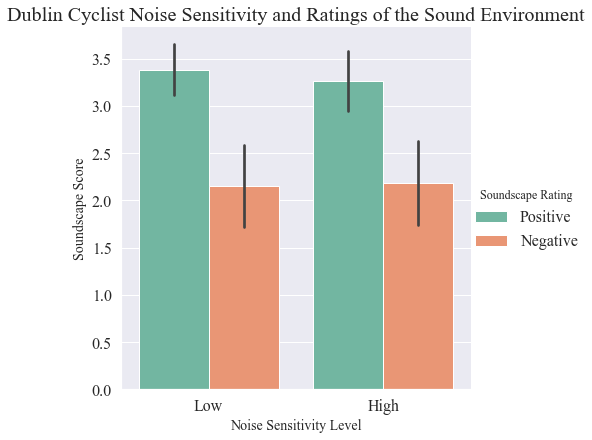

In [99]:
# visualise posiitve soundscape appraisals as function of low and high sens

plt.rc('font', size=12) #controls default text size

g = sns.catplot(
    data=noise_appraisal, kind="bar",
    x="Sensitivity", y="Soundscape Score", hue="Soundscape Rating",
    ci="sd", palette = "Set2", height=6
).set(title="Dublin Cyclist Noise Sensitivity and Ratings of the Sound Environment")
g.set_axis_labels("Noise Sensitivity Level", "Soundscape Score")

plt.savefig("Sensitivity_soundscape.png")

#### Is there a difference in mean soundscape appraisal between high and low sensitive 


In [46]:
# need to create dataframe of low and high sensitivity in columns and rows of their soundscores

low_sens = noise_appraisal[noise_appraisal['Sensitivity'] == 'Low']
high_sens = noise_appraisal[noise_appraisal['Sensitivity'] == 'High']
print(low_sens); print(high_sens)

    Participant Soundscape Score Soundscape Rating Noise Score Sensitivity
0             1              3.6          Positive         2.8         Low
4             5              3.6          Positive         3.0         Low
5             6              3.6          Positive         2.8         Low
11           12              2.6          Negative         3.0         Low
17           18              2.0          Negative         2.4         Low
..          ...              ...               ...         ...         ...
311         312              1.4          Negative         3.0         Low
315         316              2.0          Negative         1.6         Low
318         319              3.2          Positive         2.6         Low
321         322              2.0          Negative         2.2         Low
327         328              2.4          Negative         2.6         Low

[91 rows x 5 columns]
    Participant Soundscape Score Soundscape Rating Noise Score Sensitivity
1 

In [47]:
# is the distribution normal
stat, p = shapiro(low_sens['Soundscape Score'])
print('stat=%.3f, p=%.3f' % (stat, p))
stat, p = shapiro(high_sens['Soundscape Score'])
print('stat=%.3f, p=%.3f' % (stat, p))

# not Gaussian

stat=0.965, p=0.016
stat=0.985, p=0.010


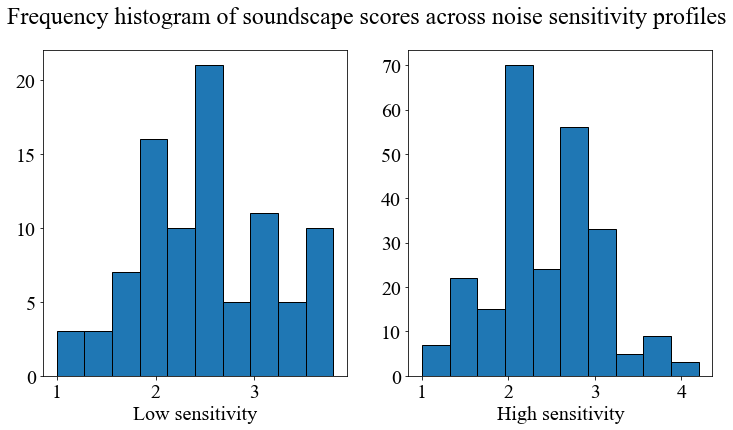

In [48]:
# histograms to eyeball normality
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of soundscape scores across noise sensitivity profiles')
ax1.hist(low_sens['Soundscape Score'], bins=10, histtype='bar', ec='k') 
ax2.hist(high_sens['Soundscape Score'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Low sensitivity")
ax2.set_xlabel("High sensitivity")
plt.show()


In [52]:
# as the assumptions of normality were violated I run a non parametric Mann Whitney U test
# compares the sample mean ranks or median to test whether the distributions are the same (H0) or different (H1)

# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=low_sens['Soundscape Score'], y=high_sens['Soundscape Score'], alternative = 'two-sided')
print(np.median(low_sens['Soundscape Score']))
print(np.median(high_sens['Soundscape Score']))


2.4
2.4


The results of the Mann-Whitney U test indicate that ratings of the soundscape do not differ significantly between high (Median = 2.4) and low noise sensitive cyclists (Median = 2.4, U = 11842.5, p > 0.05), we conclude that there is no significant difference between low and high noise sensitivie people in their ratings of the Dublin street soundscape. 

### Does noise sensitivity impact experience and behaviour
####  Detours, time of day to cycle, wellbeing 

In [154]:
# add pp id to detour, time_influence, wellbeing_influece dataframe 
pp_sensitivity_impacts = pd.DataFrame({'Participant': participant, 'Detour': detour, 'Time Influence': time_influence, 'Wellbeing Influence': well_being})

# Append noise sensitivity scores  
pp_sensitivity_impacts = pd.concat([pp_noise_scores, pp_sensitivity_impacts], axis=1)

# drop duplicate participant column
pp_sensitivity_impacts = pp_sensitivity_impacts.T.drop_duplicates().T 
pp_sensitivity_impacts

,Participant,Noise Score,Sensitivity,Detour,Time Influence,Wellbeing Influence
0,1,2.8,Low,No,No,No
1,2,3.4,High,No,No,No
2,3,3.6,High,No,Yes,Yes
3,4,4.8,High,No,No,Yes
4,5,3.0,Low,No,Yes,No
...,...,...,...,...,...,...
330,331,4.8,High,No,No,Yes
331,332,3.4,High,No,No,No
332,333,3.6,High,Yes,Yes,Yes
333,334,4.4,High,No,No,Yes


In [160]:
# replace ratings with scores
replacer = {'Yes': 1, 'No':0}

cols = pp_sensitivity_impacts.columns[pp_sensitivity_impacts.dtypes == 'object']
pp_sensitivity_impacts[cols] = pp_sensitivity_impacts[cols].replace(replacer)

#remove sensitivity to assess normality
pp_sensitivity_impacts.drop('Sensitivity', inplace=True, axis=1)


In [162]:
# Check normality
for i in pp_sensitivity_impacts:
    stat, p = shapiro(pp_sensitivity_impacts[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(i, 'is probably Gaussian')
    else:
        print(i, 'is probably not Gaussian')
        

stat=0.955, p=0.000
Participant is probably not Gaussian
stat=0.980, p=0.000
Noise Score is probably not Gaussian
stat=0.617, p=0.000
Detour is probably not Gaussian
stat=0.589, p=0.000
Time Influence is probably not Gaussian
stat=0.636, p=0.000
Wellbeing Influence is probably not Gaussian


In [163]:
# correlatation between categorical variables 
# first create contingency table
from scipy.stats import chi2_contingency 

chisqt = pd.crosstab(pp_sensitivity_impacts['Noise Score'], pp_sensitivity_impacts['Detour'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
x = chi2_contingency(chisqt)
print(x[0:3])



(16.326275233656553, 0.9996744775812615, 40)


A Chi-Square Test of Independence was performed to assess the relationship between Noise sensitivity score and detour behaviour.
There was not a significant relationship between the two variables, X**2(40, N = 335) = 16.33, p = .999. Scoring high or low in noise sensitivity had no association with reports of taking detours to avoid noisy routes.


In [164]:
chisqt = pd.crosstab(pp_sensitivity_impacts['Noise Score'], pp_sensitivity_impacts['Time Influence'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
x = chi2_contingency(chisqt)
print(x[0:3])


(23.14151628403882, 0.9848240558250991, 40)


In [165]:
chisqt = pd.crosstab(pp_sensitivity_impacts['Noise Score'], pp_sensitivity_impacts['Wellbeing Influence'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
x = chi2_contingency(chisqt)
print(x[0:3])


(25.63264491123182, 0.96211218123757, 40)


In [166]:
chisqt = pd.crosstab(pp_sensitivity_impacts['Time Influence'], pp_sensitivity_impacts['Wellbeing Influence'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
x = chi2_contingency(chisqt)
print(x[0:3])
 # to control the chance of type 1 error 
    
    

(16.04265794452691, 0.00296245396207136, 4)


In [177]:
# bonferroni correction 

a = 0.05 # oriniginal alpha level
n = 4 # no of tests
fwer = 1-(1-a)**n # family wise type 1 error rate
fwer
# bonferroni correction
a_new = a/n
a_new # only reject null hyp if p-value is less than this

0.0125

## Q17-19 Age, gender, life status

In [62]:
demographic_df = dataset[['What age are you?', 'Which gender do you most identify with? (If you prefer to self-describe, please leave a comment)', 'Which best describes your current life situation?    ']]
demographic_df

,What age are you?,"Which gender do you most identify with? (If you prefer to self-describe, please leave a comment)",Which best describes your current life situation?
0,26-35,Man,Employed
1,46-55,Man,Employed
2,26-35,Man,Employed
3,26-35,Man,Employed
4,18-25,Man,Employed
...,...,...,...
330,26-35,Man,Employed
331,36-45,Woman,Employed
332,36-45,Man,Employed
333,36-45,Woman,Employed


In [63]:
# reorder x ticks for plotting below
dataset['What age are you?']= pd.Categorical(dataset['What age are you?'], ['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])


In [79]:
# age breakdown

# make df compatible to include percentage share of responses 
ages = (dataset['What age are you?'].value_counts(normalize=False)).to_frame()
ages.reset_index(inplace=True) # give us back an index
ages.columns = ['Age','Percentage'] # rename columns
#ages

# reorder the age ranges
#ages = pd.Categorical(ages['Age'], ['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])
ages

,Age,Percentage
0,36-45,117
1,26-35,106
2,46-55,70
3,18-25,24
4,56-65,11
5,66+,5


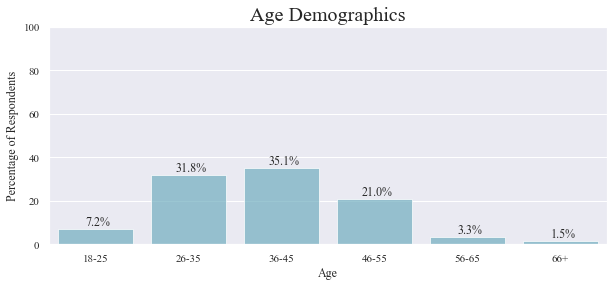

In [77]:
ax = sns.barplot(data=ages, x='Age', y='Percentage', color="c", alpha=.7)


plt.title('Age Demographics', fontdict={'fontsize': 20})
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=0) 
ax.set_ylim(0, 100) # expand ylim to make labels easier to read

# label heights of bars i.e. percentages on plot
rects = ax.patches
def autolabel(rects): # define a function
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') # horizontally and vertically align
# call the function 
autolabel(rects)

In [80]:
# gender breakdown
demographic_df['Which gender do you most identify with? (If you prefer to self-describe, please leave a comment)'].value_counts(normalize=False)


Man           219
Woman         113
Non-binary      3
Name: Which gender do you most identify with? (If you prefer to self-describe, please leave a comment), dtype: int64

In [81]:
# life status breakdown
demographic_df['Which best describes your current life situation?    '].value_counts(normalize=False)

## check this does it add up to 100%?

Employed                             295
Student                               25
Unemployed                             8
Non-waged work e.g. domestic care      7
Name: Which best describes your current life situation?    , dtype: int64